<a id='back_to_top'></a>
# Water Bottle Image Classification Dataset
"Classifying Water Bottle Images Based on Water Level Using Machine Learning"

**Created By**: Wuttipat S. <br>
**Created Date**: 2023-02-10 <br>
**Status**: <span style="color:red">Ongoing</span>

#### Update: 
- **Version5**
    1. Train and run model with resampling set, which return accucary
        - 49% with GridSearchCV (Further tune)
- **Version4**
    1. Add Data Resampling
    2. Add load images included .*png* file
- **Version3**
    1. Add heatmap crosstab plot

# Table of contents

### 1. [Introduction](#introduction)
- [Project Objective](#project_objective)
- [Dataset Description](#dataset_description)
- [About this directory](#about_this_directory) 

### 2. [Importing Data from the Directory](#load_dataset) 
### 3. [Data Preprocessing](#data_preprocessing) 
1. [Data Augmentation & Data Resampling](#data_augmentation)
2. [Nomalizing images value](#nomalizing_images_value)
3. [Convert the labels into one-hot encoder array](#convert_the_labels_into_one_hot_encoder_array)

### 4. [Machine Learning Model](#machine_learning_model) 
### 5. [Hyperparameter Tuning](#hyperparameter_tuning)
- [GridSearchCV](#gridsearchcv)

##  [Note](#note)

<br><br><br>

---
<a id='introduction'></a>
# Introduction

<a id='project_objective'></a>
## Project Objective: 
The main objective of this project is to develop a machine learning model that can accurately classify water bottle images based on their water levels. The model will be trained on a dataset of water bottle images, with each image being labeled as Full water level, Half water level, or Overflowing. The goal is to develop a model that can accurately classify a given water bottle image based on its water level.

<a id='dataset_description'></a>
## Dataset Description: 
The dataset consists of water bottle images that have been classified based on the level of water inside the bottle. There are three categories of images: Full water level, Half water level, and Overflowing. Each category contains a number of images of water bottles with the corresponding water level. The purpose of the dataset is to be used for an image classification problem, where a machine learning model is trained to classify the water level of a given water bottle image.

The dataset is intended to be used for training and testing a machine learning model for image classification. The model will be trained on the provided images, with each image being labeled as either Full water level, Half water level, or Overflowing. The goal of the model is to accurately classify a given water bottle image based on its water level.

The dataset consists of a number of water bottle images, each of which has been classified based on the water level inside the bottle. The images in the Full water level category show water bottles with the maximum possible amount of water inside, while the images in the Half water level category show water bottles with roughly half the maximum amount of water inside. The images in the Overflowing category show water bottles with more water inside than the maximum capacity of the bottle, resulting in water spilling out.

The dataset is likely to be useful for a variety of applications, such as developing automated systems for monitoring and managing water levels in containers or for use in a general image classification problem. The dataset may also be useful for research purposes, as it allows for the development and testing of machine learning models for image classification tasks.

<a id='about_this_directory'></a>
### About this directory
"This folder contains 308 images of water bottles with full water levels. The images show a variety of water bottle sizes and shapes, and are captured from a range of angles. The water bottles are made of plastic and are in good condition. These images could be useful for training a machine learning model to recognize full water levels in water bottles."
#### The dataset contains with 3 folder:
1. Full Water Level - 308 images of full water bottle
2. Half water lavel - 139 images of half water bottle
3. Overflowing - 39 images of overflowing bottle

---
<a id='load_dataset'></a>
## Importing Data from the Directory
I started by importing the data from the directory. Using the OS module in python to access the directory and its sub-directories. Then use the OpenCV library to read the image files and convert them into arrays that can be processed by the machine learning model.

In [1]:
import os
import cv2
import numpy as np

import warnings
warnings.filterwarnings('ignore') # Hide all warnings


data = []
labels = []
image_size = (128, 128)

# Access the directory and sub-directories and so on
# directory = "water-bottle-dataset"
directory = "/kaggle/input/water-bottle-dataset"

# Extract all images file inside the folders and stored them into list
for sub_folder in os.listdir(directory):
    sub_folder_path = os.path.join(directory, sub_folder)
    for sub_sub_folder in os.listdir(sub_folder_path):
        sub_sub_folder_path = os.path.join(sub_folder_path, sub_sub_folder)
        for image_file in os.listdir(sub_sub_folder_path):
            if image_file.endswith(".jpeg") or image_file.endswith(".png"): # Check if the file ends with either '.jped' or '.png'
                image_path = os.path.join(sub_sub_folder_path, image_file)
                # Read the image using OpenCV
                image = cv2.imread(image_path) #the decoded images stored in **B G R** order.
                # Resize the image to a standard size
                image = cv2.resize(image, image_size)
                # Append the image to the data list
                data.append(image)
                # Append the label to the labels list
                labels.append(sub_folder)

# Convert the data and labels lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Print the dimension of dataset
print(f'data shape:{data.shape}')
print(f'labels shape:{labels.shape}')

data shape:(486, 128, 128, 3)
labels shape:(486,)


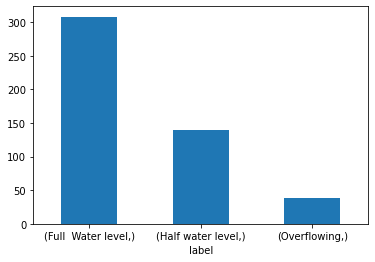

In [2]:
'''
See how many numbers of each labels
'''

import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({"label":labels})
df.value_counts().plot(kind='bar')
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.show()

---
<a id='data_preprocessing'></a>
## Cleaning and Data Preprocessing
Now that we have imported the data, and need to clean and preprocess the data so that it can be used to train the machine learning model. The following preprocessing steps will be performed:

1. **Generate augmented data**. The augmented data is concatenated with the original data to increase the size of the training data.
2. **Resampling** is the process of randomly adding or removing data from the dataset to balance the classes. There are two main resampling techniques:

    - Undersampling: Undersampling involves randomly removing data from the majority class so that the number of samples in the majority class is the same as the number of samples in the minority class.

    - Oversampling: Oversampling involves randomly replicating data from the minority class so that the number of samples in the minority class is the same as the number of samples in the majority class.
    
    In this notebook I will use *oversampling*.
2. **Normalizing** the pixel values to a range between 0 and 1
3. **Converting** the labels into one-hot encoded arrays

<a id='data_augmentation'></a>
#### 1. Data Augmentation & Data Resampling

* In the begining of developing the model I generate images by multiplte them for original dateset, the accuracy given is above 80%. But I realize that not answer I look for, since the majority label of dataset is "Full Water Level". My model are overfitting with the training data, furthermore the test set also engoving with "Full Water Level", thus it typical to return high accuracy score.
* Next step I bring a *Data Resampling* to fix the overfitting problem. Trainning and test set are equally labels generated.

In [3]:
# Generate augmented data

from keras.preprocessing.image import ImageDataGenerator

# Load the data
X = data # array of preprocessed data
y = labels # array of labels
n_gen = 30

# Create data generator
datagen = ImageDataGenerator(
        rotation_range=0, #0
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Fit the data generator on the data
datagen.fit(X)

# Generate augmented data
X_augmented, y_augmented = [], []

'''
# Non resampling
for X_batch, y_batch in datagen.flow(X, y, batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= 100: # Setting generated augmented data
        break
'''
# With resampling
for X_batch, y_batch in datagen.flow(X[:308], y[:308], batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= n_gen: # Setting generated augmented data
        break
        
for X_batch, y_batch in datagen.flow(X[308:447], y[308:447], batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= n_gen*2.3: # Setting generated augmented data
        break
        
for X_batch, y_batch in datagen.flow(X[447:], y[447:], batch_size=32):
    X_augmented.append(X_batch)
    y_augmented.append(y_batch)
    if len(X_augmented) >= n_gen*4.2: # Setting generated augmented data
        break

# Concatenate augmented data with original data
data = np.concatenate((X, np.concatenate(X_augmented)))
labels = np.concatenate((y, np.concatenate(y_augmented)))

print(f"data augmented shape : {data.shape}")
print(f"labels augmented shape : {labels.shape}")

import pandas as pd
df = pd.DataFrame({"label":labels})
df.value_counts()

data augmented shape : (3635, 128, 128, 3)
labels augmented shape : (3635,)


label            
Half water level     1240
Full  Water level    1232
Overflowing          1163
dtype: int64

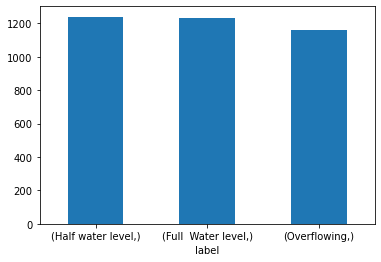

In [4]:
'''
See how many numbers of each labels. 
After I regenerated data.
'''

import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({"label":labels})
df.value_counts().plot(kind='bar')
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.show()

#### Train and Test Split

* Although mostly neural network improve the train-test split function for itself.
* I want to see a result more visualize by plot a *Confusion matrix* from *Predicted of test* and *True labels of test*. 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

data = X_train # Split training data
labels = y_train # Split training labels

X_test = X_test # Test data
y_test = y_test # Test labels

In [6]:
import pandas as pd

print(f'data shape:{data.shape}')
print(f'labels shape:{labels.shape}')
df = pd.DataFrame({"label":labels})
print(df.value_counts())
print("")
print(f'test_date shape:{X_test.shape}')
print(f'test_labels shape:{y_test.shape}')
df = pd.DataFrame({"test_labels":y_test})
print(df.value_counts())

data shape:(2908, 128, 128, 3)
labels shape:(2908,)
label            
Half water level     1000
Full  Water level     978
Overflowing           930
dtype: int64

test_date shape:(727, 128, 128, 3)
test_labels shape:(727,)
test_labels      
Full  Water level    254
Half water level     240
Overflowing          233
dtype: int64


<a id='nomalizing_images_value'></a>
#### 2. Nomalizing images value

In [7]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0


# Preprocess the input data
#data = np.reshape(data, (data.shape[0], 224, 224, 3)) # Reshape image pixel values into specific value

<a id='convert_the_labels_into_one_hot_encoder_array'></a>
#### 3. Convert the labels into one-hot encoder array
Since model create prediction output as (n, 3) dimension array. Converting labels into same type is require for calcuate the model's accuracy and loss.

In [8]:
labels = labels
# Convert the labels into one-hot encoded arrays
labels_one_hot = np.zeros((labels.shape[0], 3))

for i, label in enumerate(labels):
    if label == "Full  Water level":
        labels_one_hot[i, 0] = 1
    elif label == "Half water level":
        labels_one_hot[i, 1] = 1
    else:
        labels_one_hot[i, 2] = 1

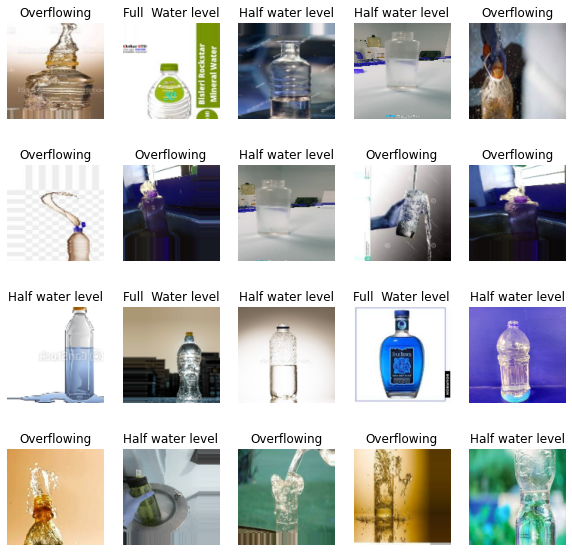

In [9]:
'''
Show a sample of images from the dataset
'''

import matplotlib.pyplot as plt

# Load the data
data = data

# choose 20 random indices
indices = np.random.randint(0, len(data), 20)

# Get 20 sample images
sample_images = data[indices]

# Plot the images
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])
    
plt.show()

###### Generate augmented images files

In [10]:
'''
# Save augmented images to specific directory --- Uncomment to use
# create new directory to save augmented images
import os

# Check existing directory, if not: crate new directory
if not os.path.exists("augmented_images"):
    os.makedirs("augmented_images")

augmented_data = data
labels = labels
# loop through each image in the augmented data
for i, image in enumerate(augmented_data):
    # convert the image back to its original form
    image = (image).astype("uint8")
    
    # save the image to the new directory
    cv2.imwrite(f"augmented_images/augmented_{labels[i]}_{i}.jpeg", image)
'''

'\n# Save augmented images to specific directory --- Uncomment to use\n# create new directory to save augmented images\nimport os\n\n# Check existing directory, if not: crate new directory\nif not os.path.exists("augmented_images"):\n    os.makedirs("augmented_images")\n\naugmented_data = data\nlabels = labels\n# loop through each image in the augmented data\nfor i, image in enumerate(augmented_data):\n    # convert the image back to its original form\n    image = (image).astype("uint8")\n    \n    # save the image to the new directory\n    cv2.imwrite(f"augmented_images/augmented_{labels[i]}_{i}.jpeg", image)\n'

---
<a id='machine_learning_model'></a>
## Machine Learning Model
Finally, we will build, train, and evaluate machine learning models for the image classification problem. I will use the Keras library in Python to build and train the models.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD

# set seed value for randomization
# np.random.seed(42)
tf.random.set_seed(42)

# Build the model using a Convolutional Neural Network
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# See an overview of the model architecture and to debug issues related to the model layers.
model.summary()

2023-02-19 09:20:39.747937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 09:20:39.836313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 09:20:39.837246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 09:20:39.839013: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [12]:
# Train the model

# set an early stopping mechanism
# set patience to be tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

# history = model.fit(data, labels_one_hot, batch_size=32, epochs=10, validation_split=0.2)
history = model.fit(x=data,
                    y=labels_one_hot,
                    batch_size=256, #128 best
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Evaluate the model
print("Test accuracy: ", max(history.history['val_accuracy']))

2023-02-19 09:20:43.625478: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-02-19 09:20:45.525152: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


10/10 [==============================] - 10s 159ms/step - loss: 2.3181 - accuracy: 0.3611 - val_loss: 1.0902 - val_accuracy: 0.4141
Epoch 2/50
10/10 [==============================] - 1s 105ms/step - loss: 1.0913 - accuracy: 0.4144 - val_loss: 1.0530 - val_accuracy: 0.3935
Epoch 3/50
10/10 [==============================] - 1s 97ms/step - loss: 1.0268 - accuracy: 0.4583 - val_loss: 1.0669 - val_accuracy: 0.3969
Epoch 4/50
10/10 [==============================] - 1s 84ms/step - loss: 0.9970 - accuracy: 0.4665 - val_loss: 0.9407 - val_accuracy: 0.5206
Epoch 5/50
10/10 [==============================] - 1s 85ms/step - loss: 0.9410 - accuracy: 0.5301 - val_loss: 0.8913 - val_accuracy: 0.5412
Epoch 6/50
10/10 [==============================] - 1s 84ms/step - loss: 0.8923 - accuracy: 0.5615 - val_loss: 0.8451 - val_accuracy: 0.6254
Epoch 7/50
10/10 [==============================] - 1s 83ms/step - loss: 0.8441 - accuracy: 0.6096 - val_loss: 0.8817 - val_accuracy: 0.6134
Epoch 8/50
10/10 [===

##### Plot evalution results

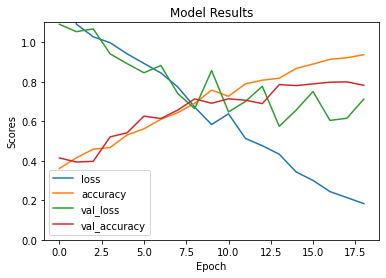

In [13]:
import matplotlib.pyplot as plt

results =  history.history
# Plot the accuracy history
# plot each line in the dictionary
for key in results:
    plt.plot(results[key], label=key)
    
plt.title('Model Results')
plt.ylabel('Scores')
plt.xlabel('Epoch')
plt.legend(list(results.keys()))
plt.ylim(0,1.1)
plt.show()

#### Plot confusion matrix

In [14]:
# Convert np.ndarray(n,3) into List of predicted labels
def output_converter(model_output):

    import numpy as np

    output = model_output

    # assume that 'output' is a numpy array of shape (n, 3)
    output_labels = ['Full  Water level', 'Half water level', 'Overflowing']
    predictions = np.argmax(output, axis=1)
    predicted_labels = [output_labels[p] for p in predictions]

    return predicted_labels

In [15]:
# Plot a Heatmap-Crosstab table out of predicted labels and True labels
def plot_hm_ct(y_true, y_pred): 
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # create a DataFrame from y_true and y_pred
    df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})

    # create cross-tabulation matrix
    ctab = pd.crosstab(df['y_true'], df['y_pred'])

    # create heatmap using seaborn
    sns.heatmap(ctab, annot=True, cmap='Blues', fmt='d')

    # add labels and title
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')

    # show the plot
    plt.show()

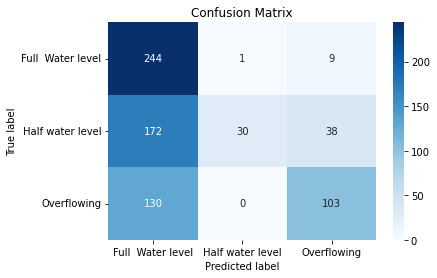

accuracy score:0.5185694635488308


In [16]:
# Load output data
y_pred = output_converter(history.model.predict(X_test))
y_true = y_test

# Plot the confusion matrix
plot_hm_ct(y_true, y_pred)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("accuracy score:{}".format(accuracy))

- Although model yield a good test accuracy, but in practically we can see it on the heatmap plot our model is overfitting due to majority of training set are 'Full of Water'
- To fix the overfitting I decide to train model with a new training set that contains same portion of data labels eqully. Then see the result.

---
<a id='hyperparameter_tuning'></a>
## 5. Hyperparameter Tuning

<a id='gridsearchcv'></a>
**GridSearchCV** is a technique used in machine learning to tune hyperparameters for a model. It allows us to define a grid of hyperparameters to test, and then it will search over all possible combinations of these hyperparameters to find the best combination for our model.

In [17]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore') # Hide all warnings


tf.random.set_seed(42)
batch_size = [256, 512]
epochs = [15,25]
optimizer = ['adam']
# optimizer = ['adam', 'rmsprop']
cv = 5 # None mean default (K-fold=5)

# Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Design Model Layers
def create_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model)

param_grid = {'batch_size': batch_size,
              'epochs': epochs,
              'optimizer': optimizer,}
#               'callbacks': [early_stopping]} # Disable callbachs function since we want model run with equal epochs for comparing


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv) 
grid_result = grid.fit(data, labels_one_hot, verbose=0)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2/2 [==============================] - 0s 11ms/step - loss: 0.5401 - accuracy: 0.8107
Best: 0.805717 using {'batch_size': 256, 'epochs': 25, 'optimizer': 'adam'}
0.783698 (0.009608) with: {'batch_size': 256, 'epochs': 15, 'optimizer': 'adam'}
0.805717 (0.011576) with: {'batch_size': 256, 'epochs': 25, 'optimizer': 'adam'}
0.743463 (0.011561) with: {'batch_size': 512, 'epochs': 15, 'optimizer': 'adam'}
0.781295 (0.028076) with: {'batch_size': 512, 'epochs': 25, 'optimizer': 'adam'}


In [18]:
'''
Transform predicted result into list
'''
output_labels = ['Full  Water level', 'Half water level', 'Overflowing']
result = grid.predict(X_test)

predicted_labels = list(map(lambda x: output_labels[x], result))
# print(predicted_labels[:5])

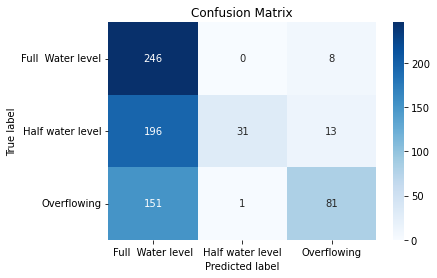

accuracy score:0.4924346629986245


In [19]:
'''
Plot and confusion metrix
'''
# Load output data
y_pred = predicted_labels
y_true = y_test

# Plot the confusion matrix
plot_hm_ct(y_true, y_pred)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("accuracy score:{}".format(accuracy))

In [20]:
'''
Overview detailed information about the grid search cross-validation process
'''
import pandas as pd
print(pd.DataFrame(grid_result.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.354781      0.504034         0.591065        0.044895   
1      21.178699      1.995437         0.580926        0.065402   
2      13.947332      4.154452         0.655247        0.076218   
3      19.931107      2.818737         0.641331        0.072678   

  param_batch_size param_epochs param_optimizer  \
0              256           15            adam   
1              256           25            adam   
2              512           15            adam   
3              512           25            adam   

                                              params  split0_test_score  \
0  {'batch_size': 256, 'epochs': 15, 'optimizer':...           0.785223   
1  {'batch_size': 256, 'epochs': 25, 'optimizer':...           0.809278   
2  {'batch_size': 512, 'epochs': 15, 'optimizer':...           0.749141   
3  {'batch_size': 512, 'epochs': 25, 'optimizer':...           0.816151   

   split1_test_score  split2_tes

<a id='note'></a>
# Note
#### Improving a machine learning model can be achieved by using various techniques such as:
* ✅ The techniques that I've applied
* ❌ The technoques that I think it not neccesary.
* 🤔 I don't know how to apply with codek and still figure out.

1. **Feature Engineering**❌: Adding or modifying the features used in the model to better capture the underlying patterns in the data.

2. **Model Selection**🤔: Choosing a different machine learning model that is more suitable for the data and the problem being solved.

3. **Hyperparameter Tuning**✅: Adjusting the parameters of the machine learning model to improve its performance. This can be done manually or using techniques such as grid search or random search.

4. **Ensemble Methods**🤔: Combining multiple models to create a more robust model. This can be done by averaging the predictions of multiple models or by training a separate model to make predictions based on the outputs of other models.

5. **Regularization**✅: Adding a penalty term to the loss function to prevent overfitting and improve generalization.

6. **Data Augmentation**✅: Increasing the size of the dataset by generating new data samples based on the original data. This can help to prevent overfitting and improve generalization.
    - After predicting unseen test set model return an ugly result.
    - To solve problem I will try clone an equally proportion labels dataset.

7. **Early Stopping**✅: Stopping the training process when the model's performance on the validation set starts to deteriorate. This can prevent overfitting and help to avoid the use of models that are too complex.

8. **Transfer Learning**🤔: Reusing pre-trained models to reduce the time and computational resources required to train a new model.
9. **Data Resampling**✅: Randomly adding or removing data from the dataset to balance the classes. 

# [Back to top](#back_to_top)